In [ ]:
# region imports
from AlgorithmImports import *
# endregion

class CasualBrownRabbit(QCAlgorithm):

    def initialize(self):

        self.set_cash(100000)
        self.set_start_date(2018,1,1)
        self.set_end_date(2019, 1, 1)
        self.spy = self.add_equity("SPY",Resolution.Daily)

        self.invest_toggle = True
        self.sell_ticket = None
        self.buy_close_price = None

    def on_data(self, data):

        if not self.portfolio.invested and self.invest_toggle:
            self.market_order(self.spy.symbol, 1)
            self.invest_toggle = False

        if self.portfolio.invested and self.sell_ticket == None:
            self.sell_ticket =  self.stop_market_order(self.spy.symbol, -1,0.9*self.securities['SPY'].close,"Stop_market_order!")
            self.buy_close_price = self.securities[self.spy.symbol].close   

        if self.sell_ticket is not None:

            if self.securities["SPY"].close > self.buy_close_price:
                
                self.buy_close_price = self.securities["SPY"].close

                updatePrice = UpdateOrderFields()
                updatePrice.StopPrice = 0.9*self.buy_close_price
                response = self.sell_ticket.Update(updatePrice)

                if response.IsSuccess:
                    self.debug("Stop price updated!")

        
    def OnOrderEvent(self,OrderEvent):

        if OrderEvent.FillQuantity == 0:
            return

        if self.sell_ticket is not None and self.sell_ticket.OrderId == OrderEvent.OrderId:
            self.log("Order executed!")


Order filled around Feb 09 2018

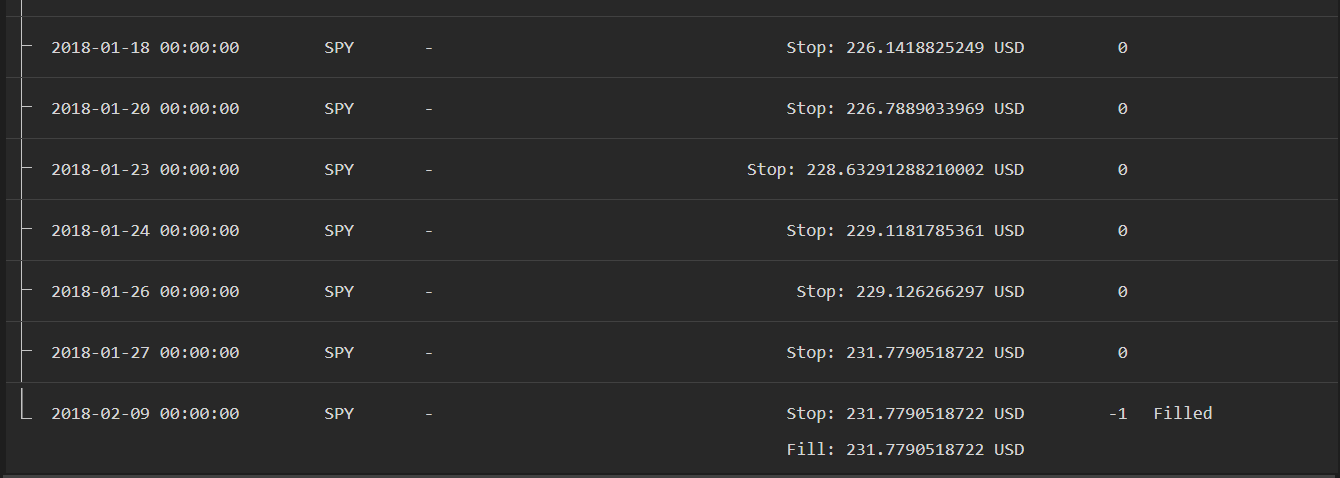

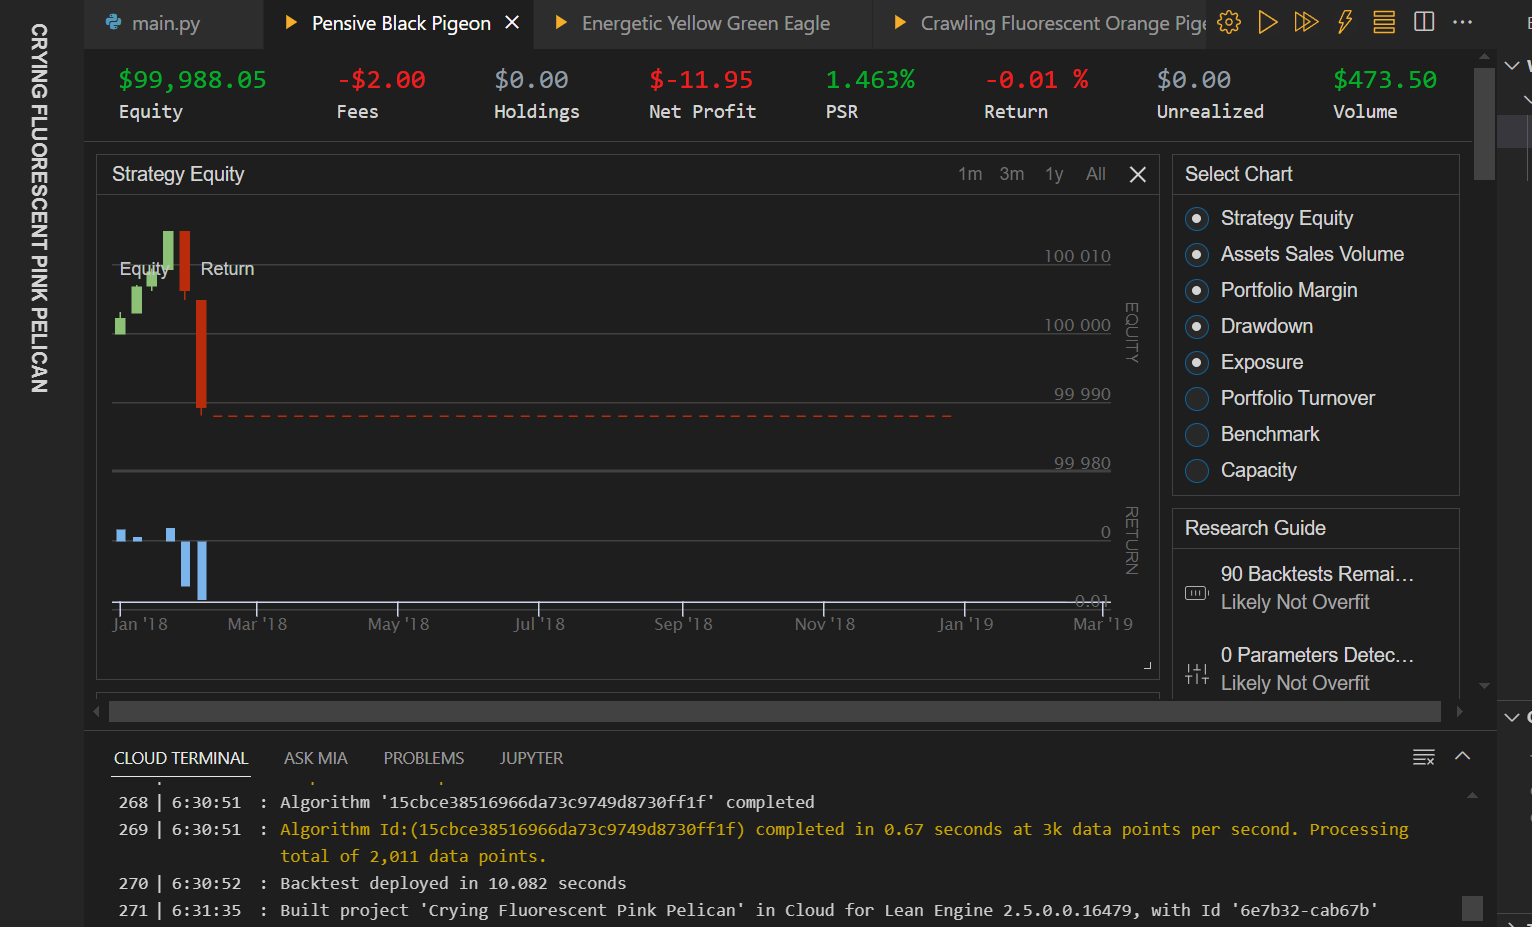

Logs

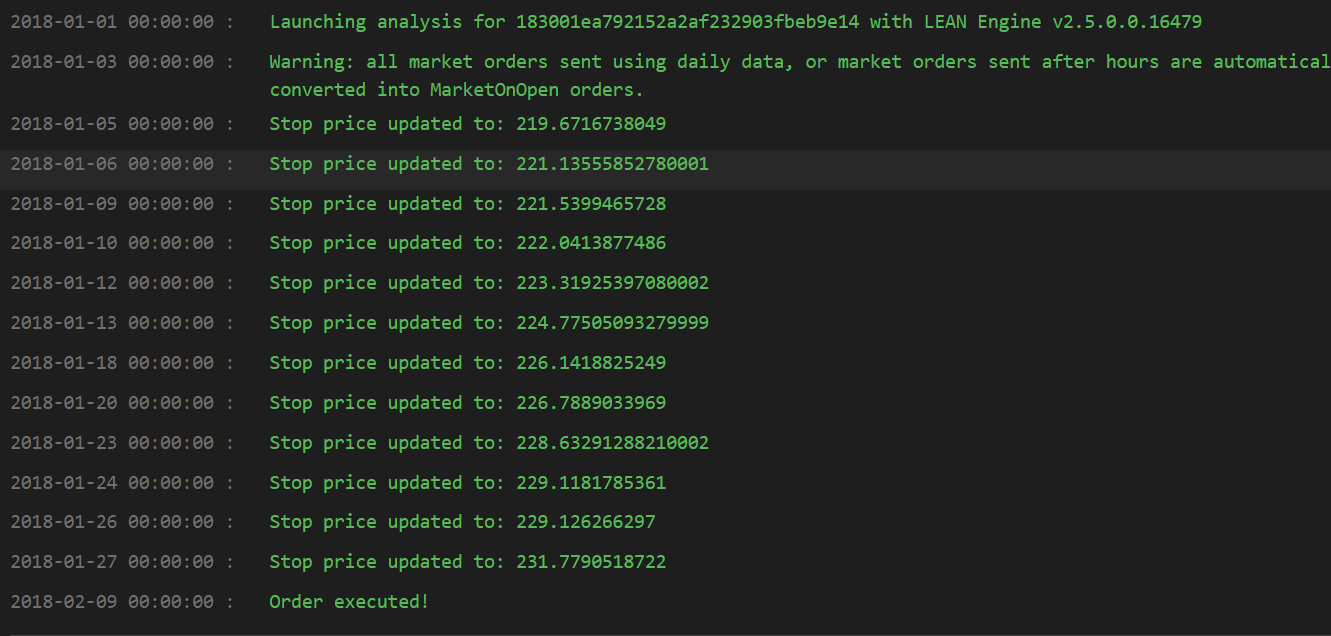